In [1]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append(os.path.abspath('../..'))

from offshore_wind_nj.config import INTERIM_DATA_DIR, ERA5_DATA_DIR, BUOY_DATA_DIR
import matplotlib.pyplot as plt
from pyproj import Proj, Transformer

2025-02-28 12:36:00.431 | INFO     | offshore_wind_nj.config:<module>:11 - PROJ_ROOT path is: /nfs/storage1/home/noriegac/Documents/Offshore_Wind_Research


# **Data Description:**

## **Data Overview:**
The dataset contains measurements from the Jersey Atlantic **onshore wind farm** consisting of **5 turbines**. The data available, shared by Brandon from Leeward Renewable Energy, LLC is from **March to December 2022**, with observations recorded every **10 minutes** for each turbine. The dataset includes time-stamped records of **wind speed**, **wind direction**, and **power output** (energy produced by each turbine), along with turbine identification information. Additionally, the data is used to analyze the **correlation** between wind conditions (speed and direction) and the corresponding energy output for each turbine.

## **Columns:**
1. **Turbine**: The identifier for each of the 5 turbines in the wind farm. The dataset includes data for each turbine separately, allowing for analysis of individual turbine performance.
2. **WindSpeed**: Wind speed measured in meters per second (m/s), recorded at regular intervals. This data is essential for assessing the potential energy generation capacity of each turbine under varying wind conditions.
3. **PowerkW**: The energy output from each turbine, measured in kilowatts (kW). This is a key performance indicator that reflects the efficiency of each turbine in converting wind energy into electrical power.
4. **WindDirection**: The direction from which the wind is blowing, measured in degrees (0° to 360°). Wind direction data is critical for understanding how the positioning of turbines affects their energy generation efficiency and for modeling wind farm layout optimization.
5. **Timestamp**: Time of measurement, recorded every 10 minutes from March to December 2022. This time series data allows for the analysis of trends, patterns, and seasonal variations in wind conditions and turbine performance.

## **Data Analysis Focus:**
1. **Resampling**: The data is resampled to different time periods (e.g., hourly, daily, weekly, monthly) to understand how wind conditions and power output change over time and to assess turbine performance under different wind patterns.
   
2. **Correlation Analysis**: There is a focus on examining the relationship between wind speed and power output, with a strong correlation observed (e.g., 0.97). This indicates that as wind speed increases, the energy output tends to rise as well, which is typical for wind turbines.

3. **Wind Roses**: Wind roses are used to visualize the distribution of wind speed and direction across different turbines. This helps in understanding the prevailing wind patterns and their impact on turbine performance.

4. **Turbine-to-Turbine Correlation**: The analysis includes investigating how similar the performance of different turbines is, with correlations around **0.9** suggesting that turbines in the same wind farm are generally experiencing similar conditions and producing similar energy outputs.

5. **Visualization**: Various plots, including line plots for time-based analysis, heatmaps for correlation analysis, and wind rose plots for spatial wind pattern analysis, are used to explore the data and interpret turbine performance under varying conditions.

---
## **Research question**
- What **atmospheric conditions** and turbine-specific factors (e.g., wake effects, yaw misalignment, or local turbulence) explain the differences in wind rose patterns across turbines, despite their strong correlation in wind speed and power output?

# Load Jersey Atlantic Wind Farm Data
## File path

In [2]:
jersy_atlantic_path = BUOY_DATA_DIR / 'JAW_Wind_Data.xlsx'

## Loading Dataset

In [3]:
df_jersey_atlantic = pd.read_excel(jersy_atlantic_path)

In [30]:
df_jersey_atlantic.head(5)

,Turbine,StampTime,WindSpeed,WindDirection,PowerkW,date,time
0,T01,2022-03-01,4.5,219.0,187.0,2022-03-01,00:00:00
1,T02,2022-03-01,4.9,151.0,282.0,2022-03-01,00:00:00
2,T03,2022-03-01,6.0,276.0,319.0,2022-03-01,00:00:00
3,T04,2022-03-01,4.1,166.0,171.0,2022-03-01,00:00:00
4,T05,2022-03-01,4.8,171.0,-10.0,2022-03-01,00:00:00


## Extract date & time separately

In [4]:
df_jersey_atlantic['date'] = df_jersey_atlantic['StampTime'].dt.date
df_jersey_atlantic['time'] = df_jersey_atlantic['StampTime'].dt.time

## Create a copy of the DF and store in the df variable

In [10]:
df = df_jersey_atlantic.copy()#.head(5)#['date'].unique()

# Exploratory Data Analysis (EDA): Wind and Power Output Trends

## Overview
This section analyzes wind speed and power output variations across different turbines over time. The goal is to observe trends at different time scales (hourly, daily, weekly, and monthly) and identify patterns in wind turbine performance.

### Methodology
1. **Data Preparation:**
   - The dataset is indexed by time (`StampTime`).
   - The focus is on numeric variables: **Wind Speed (m/s)** and **Power Output (kW)**.
   - Data is grouped by turbine for individual analysis.

2. **Resampling Intervals:**
   - Data is resampled at **four different time scales**:
     - **Hourly (H)**
     - **Daily (D)**
     - **Weekly (W)**
     - **Monthly (M)**
   - This helps capture both short-term fluctuations and long-term trends.

3. **Visualization Approach:**
   - **Line plots** are used to display wind speed and power output variations.
   - Each turbine's data is plotted separately for clearer comparison.
   - The `seaborn` library ensures a clean, readable visualization.

### Interpretation
- The trends observed in the plots help identify:
  - Consistency of wind speed and power generation over time.
  - Seasonal or periodic variations in wind energy production.
  - Differences in turbine performance, which may indicate wake effects or site-specific conditions.



/tmp/ipykernel_30981/3672521608.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = subset[numeric_cols].resample(period).mean()
/tmp/ipykernel_30981/3672521608.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = subset[numeric_cols].resample(period).mean()
/tmp/ipykernel_30981/3672521608.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = subset[numeric_cols].resample(period).mean()
/tmp/ipykernel_30981/3672521608.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = subset[numeric_cols].resample(period).mean()
/tmp/ipykernel_30981/3672521608.py:32: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  resampled = subset[numeric_cols].resample(period).mean()
/tmp/ipykernel_30981

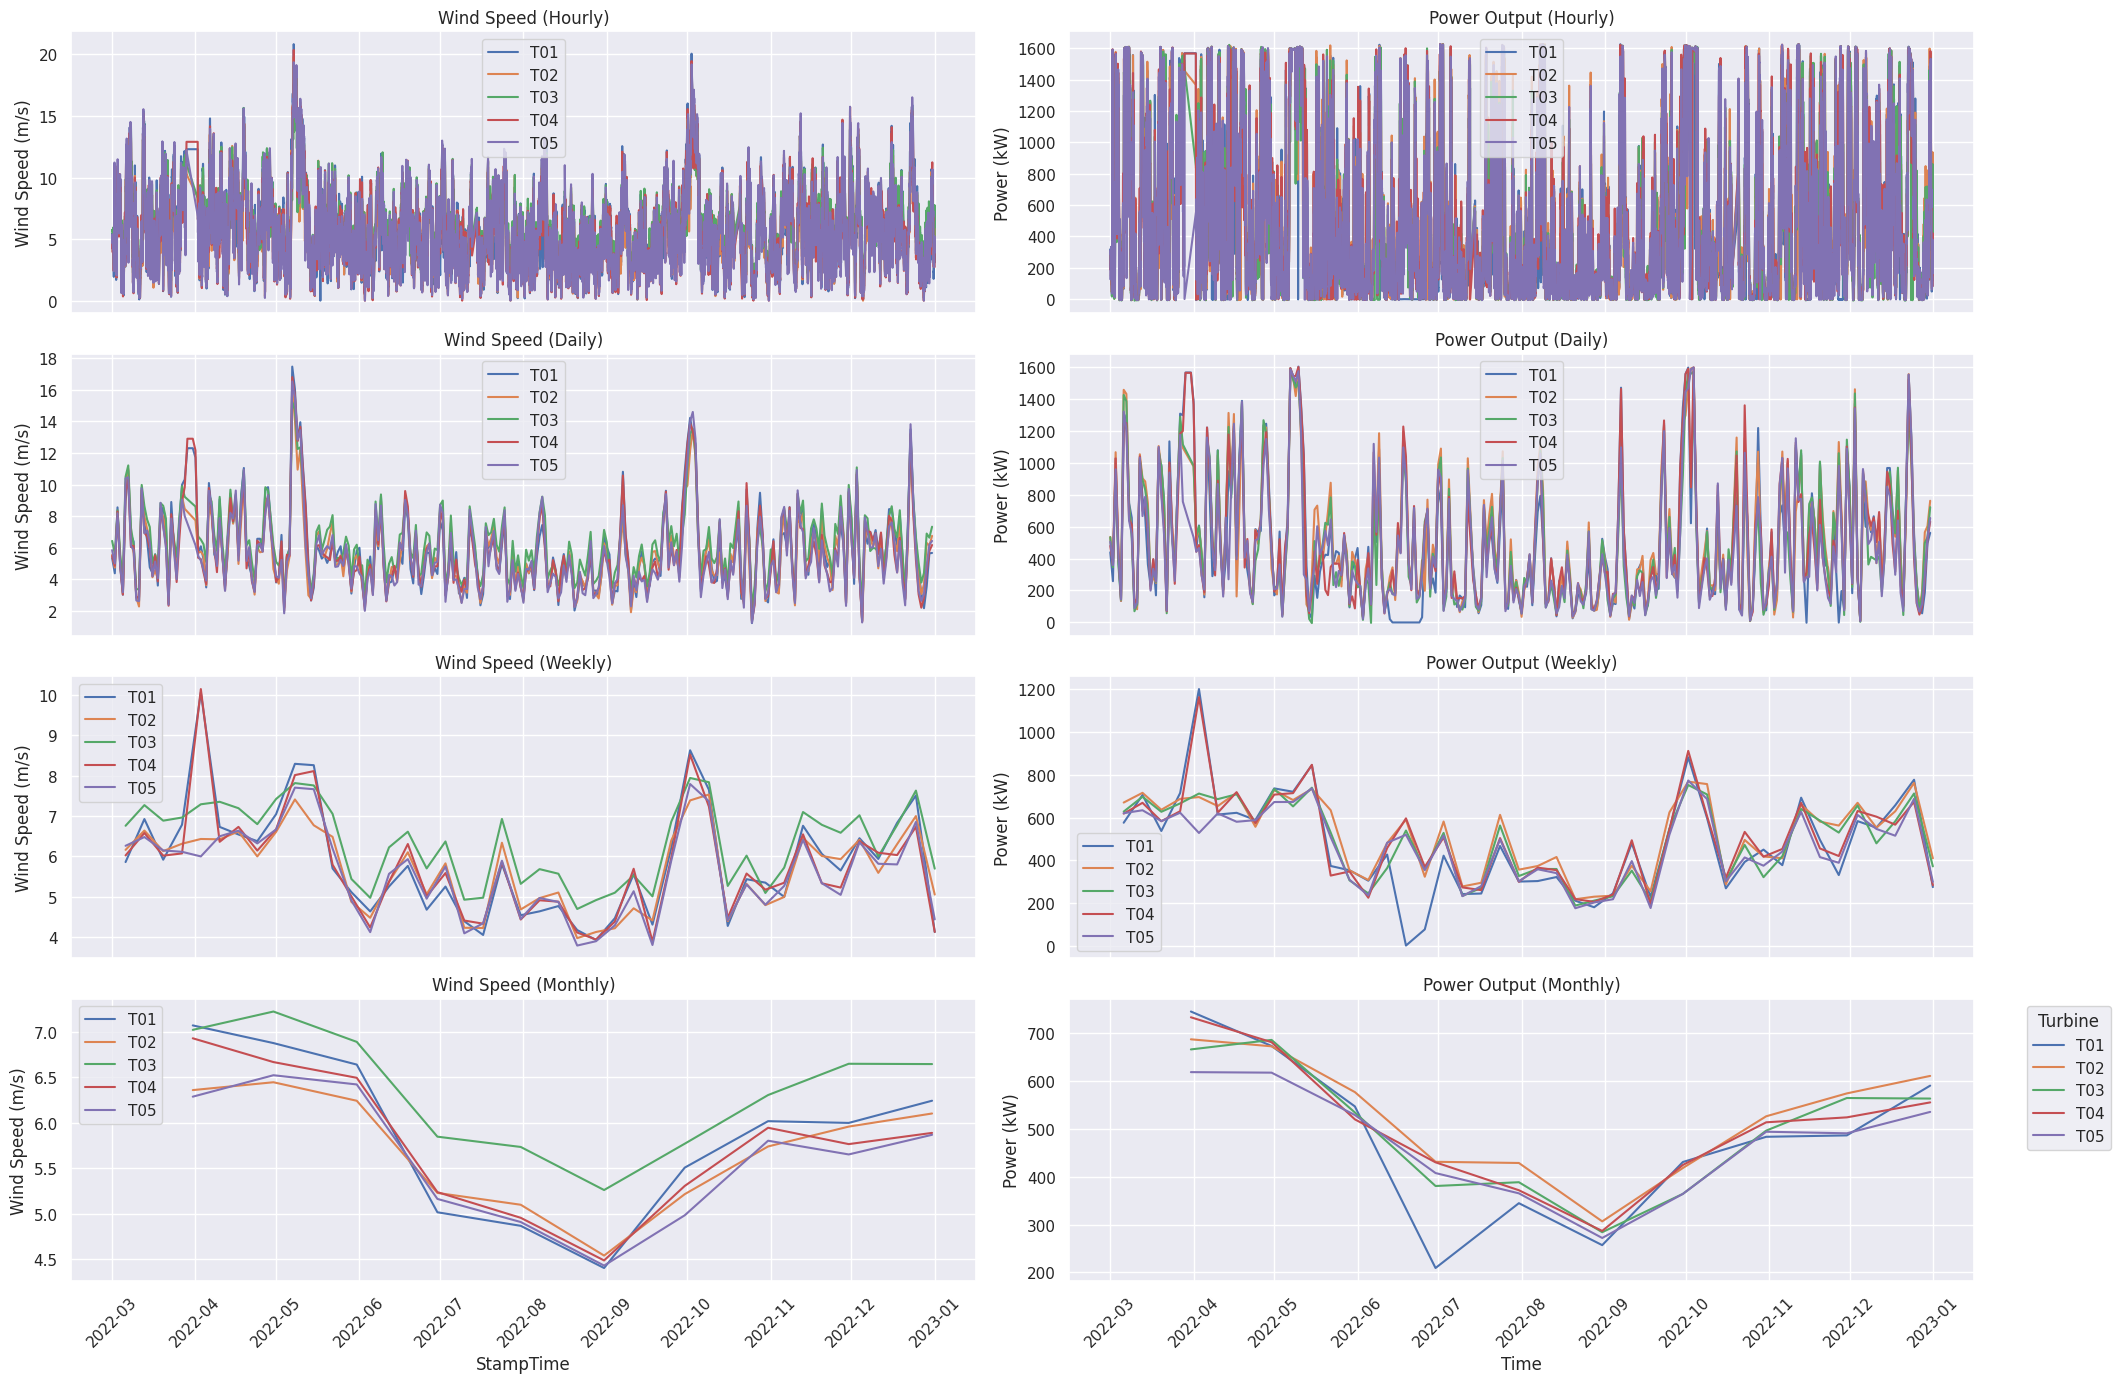

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set time as index
df.set_index('StampTime', inplace=True)

# Ensure numeric columns only (exclude WindDirection)
numeric_cols = ['WindSpeed', 'PowerkW']

# Define resampling periods
resample_periods = {
    'Hourly': 'H',
    'Daily': 'D',
    'Weekly': 'W',
    'Monthly': 'M'
}

# List of turbines
turbines = df['Turbine'].unique()

# Set Seaborn Theme
sns.set_theme(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(nrows=len(resample_periods), ncols=2, figsize=(20, 14), sharex=True)

for i, (label, period) in enumerate(resample_periods.items()):
    for turbine in turbines:
        subset = df[df['Turbine'] == turbine]  # Filter data for each turbine
        
        # Resample only numeric columns (WindSpeed and PowerkW)
        resampled = subset[numeric_cols].resample(period).mean()
        
        # Plot Wind Speed
        sns.lineplot(ax=axes[i, 0], x=resampled.index, y=resampled['WindSpeed'], label=turbine)
        
        # Plot Power Output
        sns.lineplot(ax=axes[i, 1], x=resampled.index, y=resampled['PowerkW'], label=turbine)

    # Formatting Titles and Labels
    axes[i, 0].set_title(f"Wind Speed ({label})")
    axes[i, 0].set_ylabel("Wind Speed (m/s)")
    
    axes[i, 1].set_title(f"Power Output ({label})")
    axes[i, 1].set_ylabel("Power (kW)")

# Apply x-tick rotation to all subplots
for ax in axes.flatten():
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)

# Improve Layout
plt.xlabel("Time")
plt.tight_layout()
plt.legend(title="Turbine", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


- Notably, **Turbine 3 (T03)** shows a higher wind speed average in **weekly and monthly** aggregates. This could suggest:
  - A more exposed location receiving stronger winds.
  - A possible influence of terrain or wake effects.
  - Differences in turbine calibration or maintenance schedules.

### Next Steps
- Further correlation analysis can be conducted to examine relationships between turbines.
- Investigate external factors (e.g., turbine height, location, or maintenance logs) that may explain performance differences.

## Analysis of Wind Speed Trends in Turbine 3 (T03)

Upon examining the resampled wind speed data, Turbine 3 (T03), represented by the green line, exhibits a notably higher average wind speed in both the weekly and monthly periods.

Possible factors to investigate include:

- **Turbine Location:** The geographical position of T03 within the wind farm may result in varying wind conditions. It’s worth considering if local terrain features, wind direction patterns, or other environmental factors could be influencing T03's performance.
- **Turbine Height:** While the turbine height could affect wind speed, it’s unclear whether T03’s height is significantly different from the others. A review of the height configuration might be necessary to determine its impact on the wind speed averages.
- **Measurement Errors:** Data inconsistencies or errors in the measurement process, such as sensor malfunctions or misaligned data collection, could also explain the observed discrepancy.
- **Maintenance and Operational Factors:** Variations in the operational status or maintenance schedule of T03 compared to other turbines might contribute to differences in the average wind speed.

Further analysis and comparison with external datasets (such as wind direction and terrain data) would help confirm or refute these hypotheses, providing a clearer understanding of why Turbine 3 displays these higher average wind speeds.



## Comparative Analysis: Average Wind Speed and Power Output by Turbine

### Overview
This section focuses on the comparison of **wind speed** and **power output** across turbines to assess variations in performance. By aggregating data at the turbine level, we can identify differences in energy production efficiency and potential site-specific factors affecting performance.

### Methodology
1. **Data Processing:**
   - The dataset is filtered to retain only numeric variables:  
     - **Wind Speed (m/s)**
     - **Power Output (kW)**
   - Data is resampled to **daily averages** to smooth out short-term fluctuations.
   - The average wind speed and power output are calculated for each turbine.

2. **Visualization Approach:**
   - **Bar plots** are used to provide a clear comparison of turbine performance.
   - The `seaborn` library is used to create:
     - A **Wind Speed bar plot** (`Blues` color scheme) to compare turbine exposure.
     - A **Power Output bar plot** (`Oranges` color scheme) to assess energy generation.
   - Titles and labels are added for clarity.

In [59]:
# Reshape the pivoted DataFrame into long format
df_melted = df_jersey_atlantic.pivot_table(index='StampTime', columns='Turbine', values=['WindSpeed', 'PowerkW'])

In [60]:
df_melted = df_melted.reset_index()
# Flatten MultiIndex columns
df_melted.columns = ['_'.join(col).strip() if col[1] else col[0] for col in df_melted.columns]

# Print new column names to verify
print(df_melted.columns)


Index(['StampTime', 'PowerkW_T01', 'PowerkW_T02', 'PowerkW_T03', 'PowerkW_T04',
       'PowerkW_T05', 'WindSpeed_T01', 'WindSpeed_T02', 'WindSpeed_T03',
       'WindSpeed_T04', 'WindSpeed_T05'],
      dtype='object')


In [62]:
df_melted.melt(id_vars=['StampTime'], var_name='Metric_Turbine', value_name='Value')

,StampTime,Metric_Turbine,Value
0,2022-03-01 00:00:00,PowerkW_T01,187.0
1,2022-03-01 00:10:00,PowerkW_T01,149.0
2,2022-03-01 00:20:00,PowerkW_T01,355.0
3,2022-03-01 00:30:00,PowerkW_T01,272.0
4,2022-03-01 00:40:00,PowerkW_T01,230.0
...,...,...,...
433005,2022-12-31 23:10:00,WindSpeed_T05,1.9
433006,2022-12-31 23:20:00,WindSpeed_T05,1.9
433007,2022-12-31 23:30:00,WindSpeed_T05,4.6
433008,2022-12-31 23:40:00,WindSpeed_T05,5.2


In [63]:
df_melted = df_melted.melt(id_vars=['StampTime'], var_name='Metric_Turbine', value_name='Value')

# Split 'Metric_Turbine' into separate columns
df_melted[['Metric', 'Turbine']] = df_melted['Metric_Turbine'].str.split('_', expand=True)

# Drop the merged column
df_melted.drop(columns=['Metric_Turbine'], inplace=True)

# Display result
print(df_melted.head())


            StampTime  Value   Metric Turbine
0 2022-03-01 00:00:00  187.0  PowerkW     T01
1 2022-03-01 00:10:00  149.0  PowerkW     T01
2 2022-03-01 00:20:00  355.0  PowerkW     T01
3 2022-03-01 00:30:00  272.0  PowerkW     T01
4 2022-03-01 00:40:00  230.0  PowerkW     T01


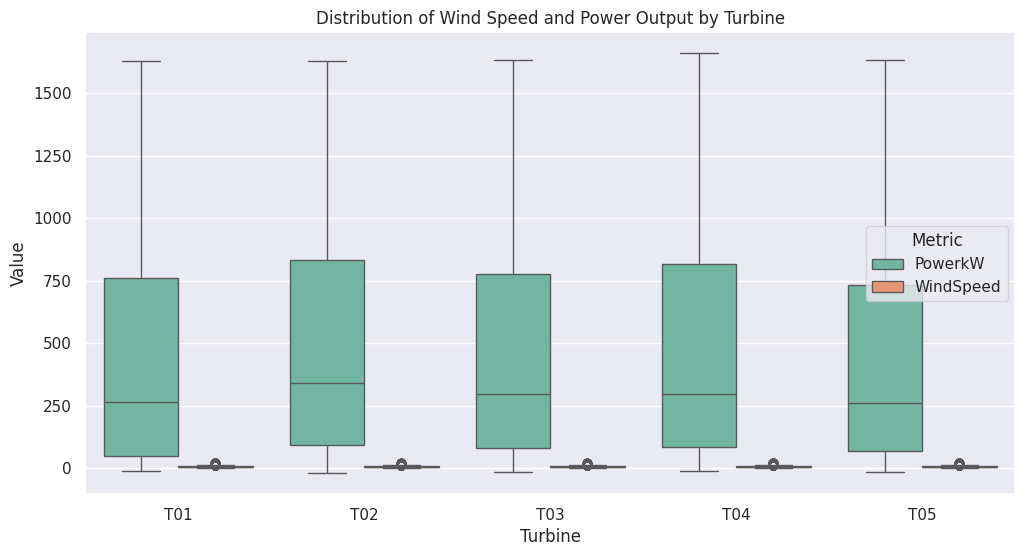

In [64]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_melted, x='Turbine', y='Value', hue='Metric', palette="Set2")
plt.title("Distribution of Wind Speed and Power Output by Turbine")
plt.ylabel("Value")
plt.xlabel("Turbine")
plt.legend(title="Metric")
plt.show()


/tmp/ipykernel_30981/3808275711.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=df_melted[df_melted['Metric'] == 'PowerkW'],
/tmp/ipykernel_30981/3808275711.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[1], data=df_melted[df_melted['Metric'] == 'WindSpeed'],


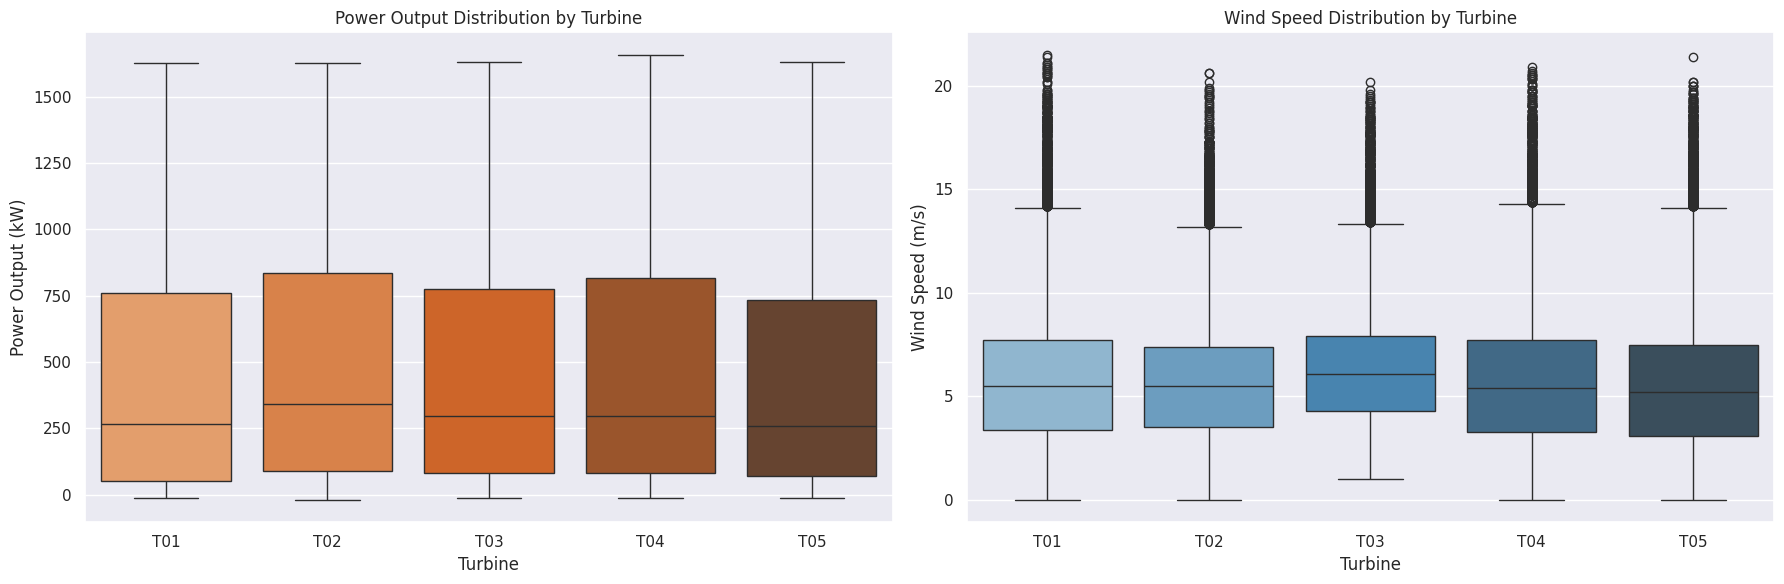

In [65]:
# Set Seaborn theme
sns.set_theme(style="darkgrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Box plot for Power Output
sns.boxplot(ax=axes[0], data=df_melted[df_melted['Metric'] == 'PowerkW'], 
            x='Turbine', y='Value', palette="Oranges_d")
axes[0].set_title("Power Output Distribution by Turbine")
axes[0].set_ylabel("Power Output (kW)")
axes[0].set_xlabel("Turbine")

# Box plot for Wind Speed
sns.boxplot(ax=axes[1], data=df_melted[df_melted['Metric'] == 'WindSpeed'], 
            x='Turbine', y='Value', palette="Blues_d")
axes[1].set_title("Wind Speed Distribution by Turbine")
axes[1].set_ylabel("Wind Speed (m/s)")
axes[1].set_xlabel("Turbine")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


In [40]:
df_jersey_atlantic.pivot_table(index='StampTime', columns='Turbine', values=['WindSpeed', 'PowerkW'])

PowerkW                             WindSpeed            \
Turbine                 T01    T02    T03    T04    T05       T01  T02  T03   
StampTime                                                                     
2022-03-01 00:00:00   187.0  282.0  319.0  171.0  -10.0       4.5  4.9  6.0   
2022-03-01 00:10:00   149.0  332.0  284.0  163.0  -10.0       4.2  5.2  5.8   
2022-03-01 00:20:00   355.0  259.0  234.0  225.0   64.0       5.6  4.7  5.5   
2022-03-01 00:30:00   272.0  313.0  258.0  193.0  252.0       5.1  5.1  5.6   
2022-03-01 00:40:00   230.0  329.0  276.0  181.0  260.0       4.7  5.2  5.7   
...                     ...    ...    ...    ...    ...       ...  ...  ...   
2022-12-31 23:10:00    55.0   52.0   57.0   27.0   18.0       3.0  2.9  3.8   
2022-12-31 23:20:00    38.0   42.0   33.0   18.0   16.0       2.6  2.7  3.4   
2022-12-31 23:30:00   195.0  179.0  152.0  107.0  182.0       5.0  4.5  5.2   
2022-12-31 23:40:00   274.0  231.0  204.0   33.0  239.0       5.6  4.9  5.8   
2022-12-31 23:50:00   430.0  406.0  375.0  212.0  430.0       6.3  5.7  6.5   

                               
Turbine              T04  T05  
StampTime                      
2022-03-01 00:00:00  4.1  4.8  
2022-03-01 00:10:00  4.0  5.0  
2022-03-01 00:20:00  4.6  5.2  
2022-03-01 00:30:00  4.2  5.0  
2022-03-01 00:40:00  4.1  5.0  
...                  ...  ...  
2022-12-31 23:10:00  2.1  1.9  
2022-12-31 23:20:00  1.8  1.9  
2022-12-31 23:30:00  3.3  4.6  
2022-12-31 23:40:00  1.6  5.2  
2022-12-31 23:50:00  3.9  6.2  

[43301 rows x 10 columns]

In [66]:
# Calculate average PowerkW and WindSpeed for each turbine
df_avg = df_melted.groupby(['Turbine', 'Metric'])['Value'].mean().reset_index()


/tmp/ipykernel_30981/2898422295.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Turbine', y='Value', data=df_avg[df_avg['Metric'] == 'PowerkW'], palette="Oranges_d")
/tmp/ipykernel_30981/2898422295.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Turbine', y='Value', data=df_avg[df_avg['Metric'] == 'WindSpeed'], palette="Blues_d")


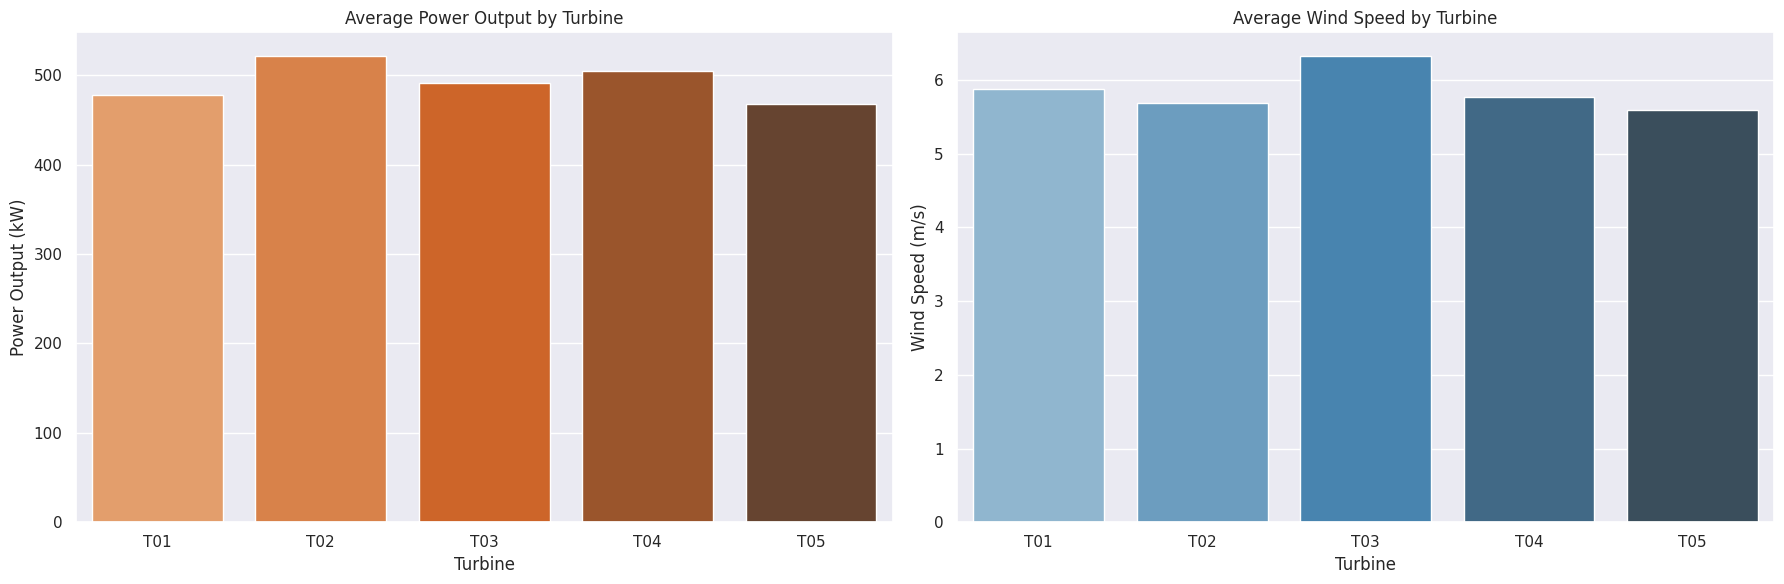

In [67]:
# Set Seaborn theme
sns.set_theme(style="darkgrid")

# Create the bar plot
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Bar plot for average Power Output
sns.barplot(ax=axes[0], x='Turbine', y='Value', data=df_avg[df_avg['Metric'] == 'PowerkW'], palette="Oranges_d")
axes[0].set_title("Average Power Output by Turbine")
axes[0].set_ylabel("Power Output (kW)")
axes[0].set_xlabel("Turbine")

# Bar plot for average Wind Speed
sns.barplot(ax=axes[1], x='Turbine', y='Value', data=df_avg[df_avg['Metric'] == 'WindSpeed'], palette="Blues_d")
axes[1].set_title("Average Wind Speed by Turbine")
axes[1].set_ylabel("Wind Speed (m/s)")
axes[1].set_xlabel("Turbine")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


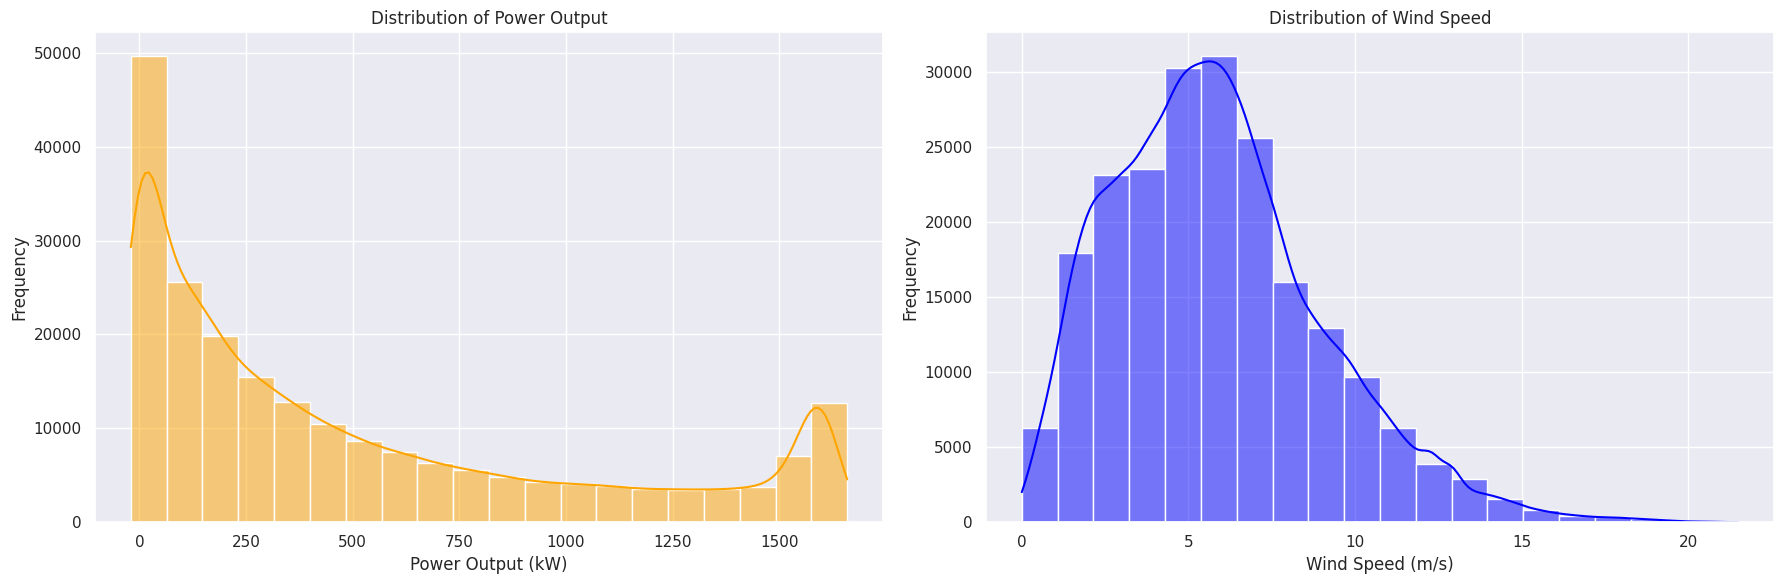

In [68]:
# Set Seaborn theme
sns.set_theme(style="darkgrid")

# Create subplots for histograms
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# Plot histogram for Power Output
sns.histplot(df_melted[df_melted['Metric'] == 'PowerkW']['Value'], ax=axes[0], kde=True, color='orange', bins=20)
axes[0].set_title("Distribution of Power Output")
axes[0].set_xlabel("Power Output (kW)")
axes[0].set_ylabel("Frequency")

# Plot histogram for Wind Speed
sns.histplot(df_melted[df_melted['Metric'] == 'WindSpeed']['Value'], ax=axes[1], kde=True, color='blue', bins=20)
axes[1].set_title("Distribution of Wind Speed")
axes[1].set_xlabel("Wind Speed (m/s)")
axes[1].set_ylabel("Frequency")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


/tmp/ipykernel_30981/3808868381.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x='Turbine', y='WindSpeed', data=df_avg, palette="Blues_d")
/tmp/ipykernel_30981/3808868381.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[1], x='Turbine', y='PowerkW', data=df_avg, palette="Oranges_d")


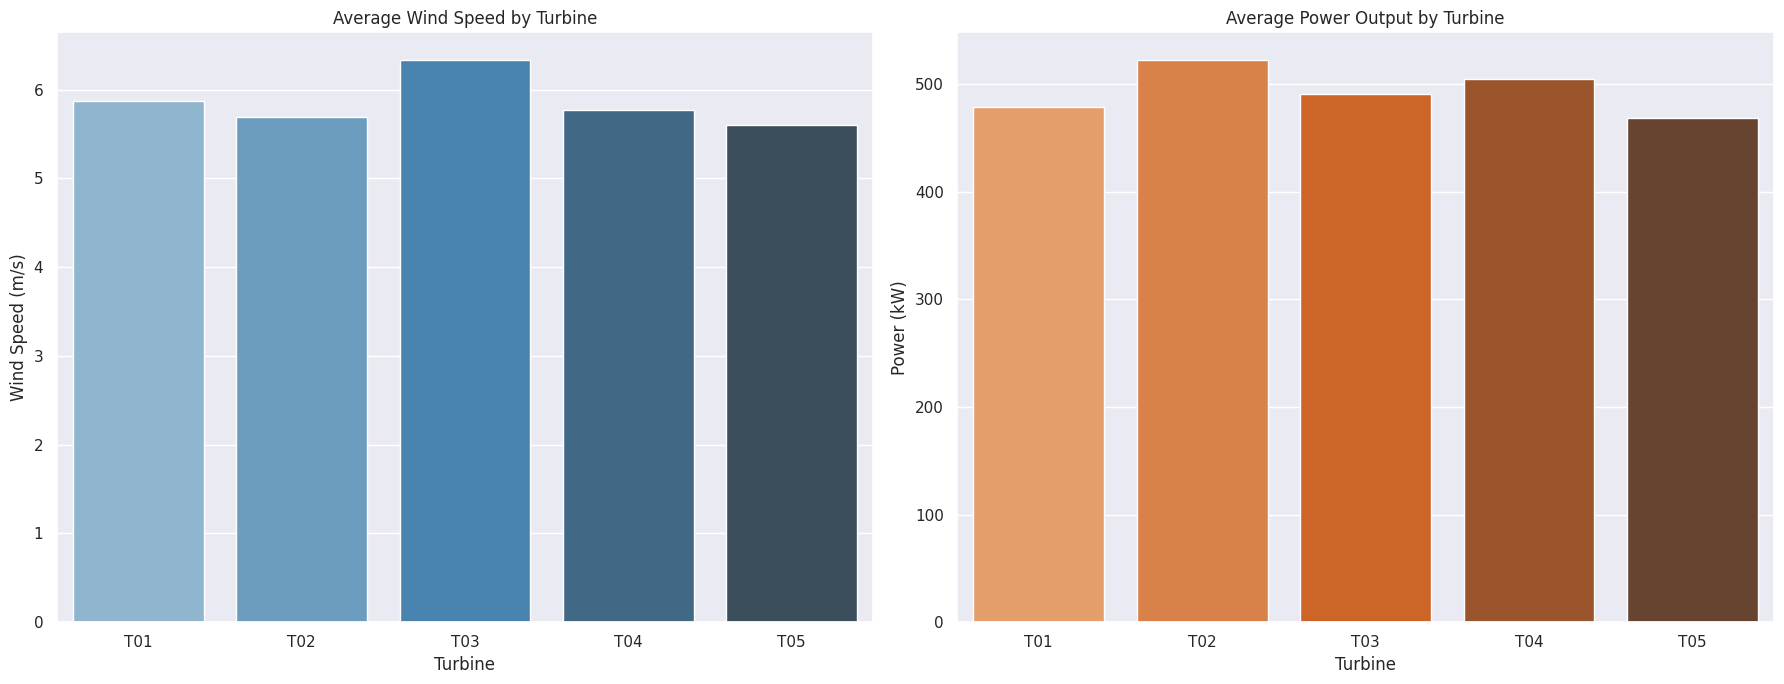

In [22]:
# Ensure numeric columns only (exclude WindDirection)
numeric_cols = ['WindSpeed', 'PowerkW']

# List of turbines
turbines = df['Turbine'].unique()

# Resample to daily values (for example, or you can choose another period)
resampled_df = df[numeric_cols].resample('D').mean()

# Create a new DataFrame to store average values for each turbine
df_avg = df.groupby('Turbine')[numeric_cols].mean().reset_index()

# Set Seaborn Theme
sns.set_theme(style="darkgrid")

# Create the bar plot for Wind Speed and Power Output by Turbine
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

# Wind Speed Bar Plot
sns.barplot(ax=axes[0], x='Turbine', y='WindSpeed', data=df_avg, palette="Blues_d")
axes[0].set_title("Average Wind Speed by Turbine")
axes[0].set_ylabel("Wind Speed (m/s)")
axes[0].set_xlabel("Turbine")

# Power Output Bar Plot
sns.barplot(ax=axes[1], x='Turbine', y='PowerkW', data=df_avg, palette="Oranges_d")
axes[1].set_title("Average Power Output by Turbine")
axes[1].set_ylabel("Power (kW)")
axes[1].set_xlabel("Turbine")

# Adjust layout for better readability
plt.tight_layout()
plt.show()


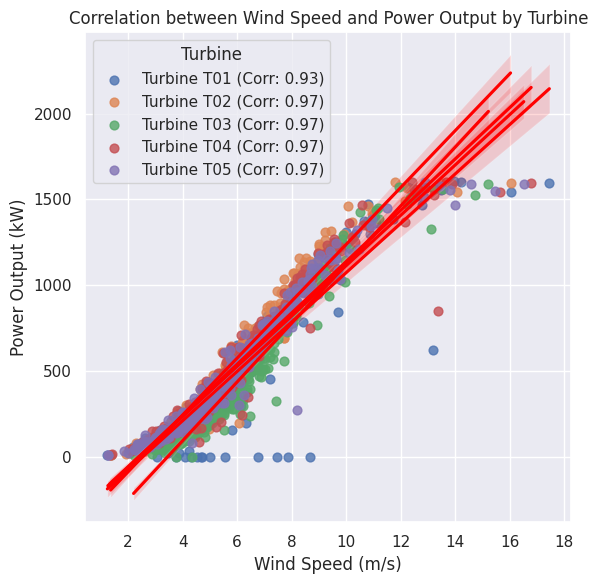

In [70]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Set time as index (if it's not already)
# df.set_index('StampTime', inplace=True)

# Ensure numeric columns only (exclude WindDirection)
numeric_cols = ['WindSpeed', 'PowerkW']

# List of turbines
turbines = df['Turbine'].unique()

# Set Seaborn Theme
sns.set_theme(style="darkgrid")

# Create a figure for correlation plot
plt.figure(figsize=(6, 6))

# Loop over each turbine to calculate correlation between WindSpeed and PowerkW
for turbine in turbines:
    subset = df[df['Turbine'] == turbine]  # Filter data for each turbine
    
    # Resample only numeric columns (WindSpeed and PowerkW)
    resampled = subset[numeric_cols].resample('D').mean()  # Daily resampling, change period if necessary
    
    # Calculate correlation between WindSpeed and PowerkW for each turbine
    correlation = resampled['WindSpeed'].corr(resampled['PowerkW'])
    
    # Plot scatter plot with regression line and label it with the turbine's correlation
    sns.regplot(x='WindSpeed', y='PowerkW', data=resampled, scatter_kws={'s': 40}, line_kws={'color': 'red'}, label=f"Turbine {turbine} (Corr: {correlation:.2f})")

# Customize the plot
plt.title("Correlation between Wind Speed and Power Output by Turbine")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Power Output (kW)")
plt.legend(title="Turbine", loc='upper left')
plt.tight_layout()
plt.show()


In [80]:
df[df['WindSpeed']==0]

,Turbine,WindSpeed,WindDirection,PowerkW,date,time
StampTime,,,,,,
2022-03-05 01:30:00,T02,0.0,237.0,-5.0,2022-03-05,01:30:00
2022-03-11 02:30:00,T05,0.0,303.0,-4.0,2022-03-11,02:30:00
2022-03-11 03:50:00,T05,0.0,303.0,-4.0,2022-03-11,03:50:00
2022-03-11 05:50:00,T05,0.0,303.0,-4.0,2022-03-11,05:50:00
2022-03-11 06:30:00,T01,0.0,154.0,-3.0,2022-03-11,06:30:00
...,...,...,...,...,...,...
2022-12-05 09:20:00,T04,0.0,345.0,-4.0,2022-12-05,09:20:00
2022-12-05 09:30:00,T01,0.0,43.0,-3.0,2022-12-05,09:30:00
2022-12-27 21:50:00,T01,0.0,20.0,-3.0,2022-12-27,21:50:00


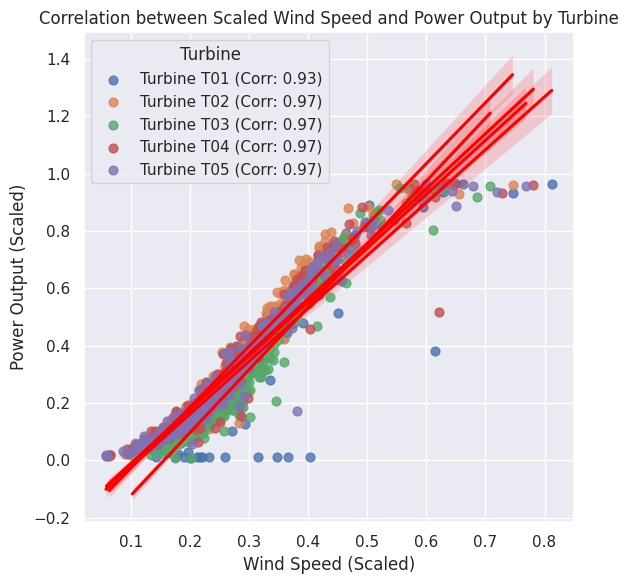

In [71]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the scaler
scaler = MinMaxScaler()

# Scale the data (WindSpeed and PowerkW)
df_scaled = df.copy()
df_scaled[['WindSpeed', 'PowerkW']] = scaler.fit_transform(df[['WindSpeed', 'PowerkW']])

# Now repeat the previous plot with the scaled data
plt.figure(figsize=(6, 6))
for turbine in turbines:
    subset = df_scaled[df_scaled['Turbine'] == turbine]
    resampled = subset[numeric_cols].resample('D').mean()
    correlation = resampled['WindSpeed'].corr(resampled['PowerkW'])
    sns.regplot(x='WindSpeed', y='PowerkW', data=resampled, scatter_kws={'s': 40}, line_kws={'color': 'red'}, label=f"Turbine {turbine} (Corr: {correlation:.2f})")

plt.title("Correlation between Scaled Wind Speed and Power Output by Turbine")
plt.xlabel("Wind Speed (Scaled)")
plt.ylabel("Power Output (Scaled)")
plt.legend(title="Turbine", loc='upper left')
plt.tight_layout()
plt.show()


In [73]:
df[numeric_cols + ['Turbine']].groupby(['Turbine']).resample('D').mean().reset_index()

,Turbine,StampTime,WindSpeed,PowerkW
0,T01,2022-03-01,5.355556,439.597222
1,T01,2022-03-02,4.388889,257.930556
2,T01,2022-03-03,8.559028,1029.305556
3,T01,2022-03-04,4.832639,411.263889
4,T01,2022-03-05,3.034266,133.804196
...,...,...,...,...
1525,T05,2022-12-27,2.647761,66.723881
1526,T05,2022-12-28,3.068056,115.006944
1527,T05,2022-12-29,4.881250,294.201389
1528,T05,2022-12-30,6.197222,531.034722


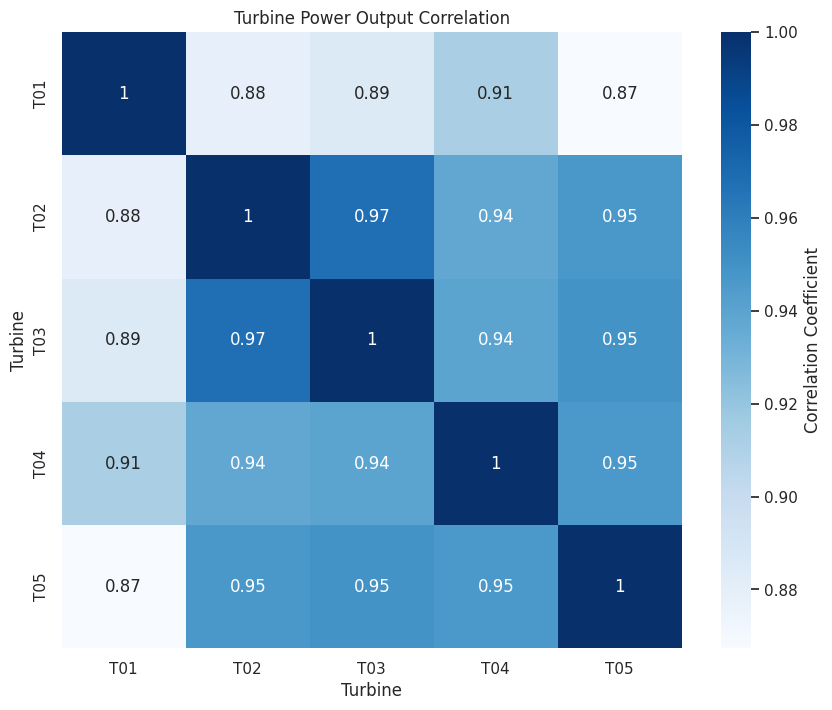

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Resample the data while preserving the 'Turbine' column
resampled_df = df[numeric_cols + ['Turbine']].groupby(['Turbine']).resample('D').mean().reset_index()

# Now, create a pivot table with turbines as columns and power output as values
power_output = resampled_df.pivot_table(index='StampTime', columns='Turbine', values='PowerkW')

# Calculate correlation matrix for power output of turbines
correlation_matrix = power_output.corr()

# Get the min and max correlation values
vmin = correlation_matrix.values.min()
vmax = correlation_matrix.values.max()

# Visualize the correlation matrix using a heatmap with a single color gradient
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=vmin, vmax=vmax, cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Turbine Power Output Correlation")
plt.show()


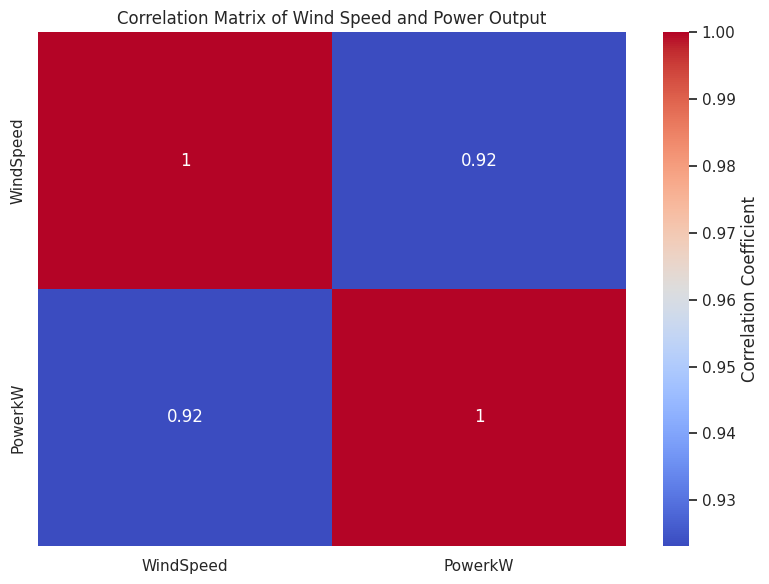

In [74]:


# Calculate the correlation matrix
correlation_matrix = df[numeric_cols].corr()

# Get the min and max correlation values
vmin = correlation_matrix.values.min()
vmax = correlation_matrix.values.max()

# Create a heatmap with a color scale from min to max
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=vmin, vmax=vmax, cbar_kws={'label': 'Correlation Coefficient'})

# Customize the plot
plt.title("Correlation Matrix of Wind Speed and Power Output")
plt.tight_layout()
plt.show()


## Hypotheses on Turbine Correlation

The high correlations observed between turbines, especially those in close proximity, suggest several potential hypotheses worth further investigation:

1. **Hypothesis 1: Wake Effect Influence**  
   Turbines located downwind of others might experience similar wind conditions due to wake effects, leading to higher correlation in power output. This hypothesis could be tested by comparing the correlation of turbines with varying degrees of downwind distance.
   - **Check wind speed and direction variability at the same time** how much are they correlated?
    
    
2. **Hypothesis 2: Topographical Impact**  
   If turbines are situated in areas with similar topography, their performance might be more closely related due to uniform wind conditions in these regions. Further analysis of topographical data and its relationship to turbine correlation could clarify this.
   - It is important to investigate whether the height of each turbine affects their correlation. While height differences could potentially influence the wind flow around each turbine, for the sake of simplicity, we could assume all turbines are at the same height for the analysis.

3. **Hypothesis 3: Proximity of Turbines**  
   The spatial distance between turbines might play a key role in their correlation. Closer turbines may experience more similar wind conditions, resulting in higher correlation. A study comparing turbines at different distances could provide insights into this effect.

4. **Hypothesis 4: Wind Direction Consistency**  
   Turbines aligned with the same prevailing wind direction might show more synchronized power outputs. This hypothesis could be explored by analyzing wind direction data and its correlation with turbine performance.

Testing these hypotheses would allow for a deeper understanding of the factors influencing turbine correlations and could guide future optimization strategies for turbine placement.


- I need to understand why some turbine correlate one to each other more than others. For example, T01 has higher correlation with T04, which they are close (North-East of the wind farm). Likewise, T03 has a higher correlation with T02, which are next to the other on the south west of the wind farm

/tmp/ipykernel_30981/1871862138.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap)


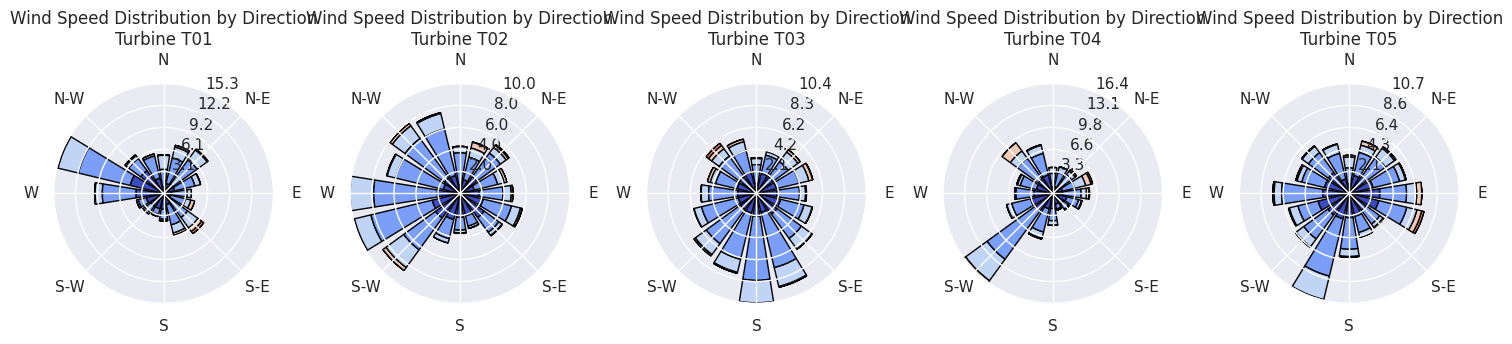

/tmp/ipykernel_30981/1871862138.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap(cmap)


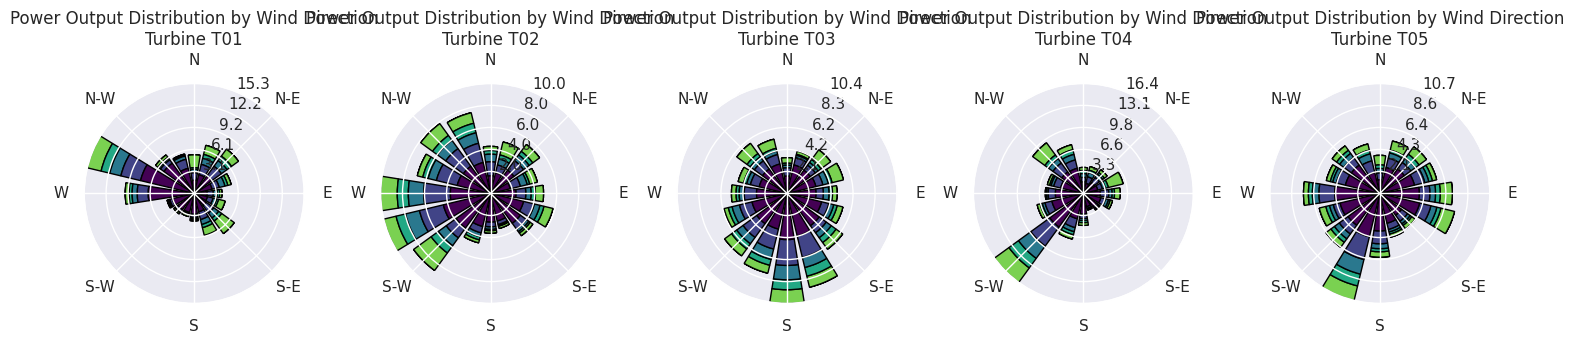

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import matplotlib.cm as cm  # Import the colormap module


# List of turbines
turbines = df['Turbine'].unique()

# Define function to create wind roses
def plot_wind_rose(df, variable, title, cmap="coolwarm"):
    fig, axes = plt.subplots(nrows=1, ncols=len(turbines), figsize=(15, 5), subplot_kw={'projection': 'windrose'})
    
    # Convert cmap string to a colormap object
    cmap = cm.get_cmap(cmap)
    
    for i, turbine in enumerate(turbines):
        subset = df[df['Turbine'] == turbine]
        
        ax = axes[i] if len(turbines) > 1 else axes
        ax.bar(subset['WindDirection'], subset[variable], normed=True, opening=0.8, edgecolor='black', cmap=cmap)
        
        ax.set_title(f"{title}\nTurbine {turbine}")
    
    plt.tight_layout()
    plt.show()

# Generate Wind Roses
plot_wind_rose(df, 'WindSpeed', "Wind Speed Distribution by Direction")
plot_wind_rose(df, 'PowerkW', "Power Output Distribution by Wind Direction", cmap="viridis")


In [16]:
import folium

# List of turbine coordinates
turbines = [
    {"name": "Turbine #1", "latitude": 39.3839, "longitude": -74.4485},
    {"name": "Turbine #2", "latitude": 39.3822, "longitude": -74.4504},
    {"name": "Turbine #3", "latitude": 39.3801, "longitude": -74.4497},
    {"name": "Turbine #4", "latitude": 39.3825, "longitude": -74.4454},
    {"name": "Turbine #5", "latitude": 39.3811, "longitude": -74.4477}
]

# Create a folium map centered around the turbines
m = folium.Map(location=[39.382, -74.447], zoom_start=15)

# Add Google Maps tile layer (using Stamen Toner as a placeholder)
folium.TileLayer('cartodb positron').add_to(m)  # You can use 'cartodb positron' for a light map layer.

# Plot each turbine as a marker on the map
for turbine in turbines:
    folium.Marker(
        location=[turbine["latitude"], turbine["longitude"]],
        popup=f'{turbine["name"]}',
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map
m.save("turbines_map.html")


In [18]:
import folium
from IPython.display import display

# List of turbine coordinates
turbines = [
    {"name": "Turbine #1", "latitude": 39.3839, "longitude": -74.4485},
    {"name": "Turbine #2", "latitude": 39.3822, "longitude": -74.4504},
    {"name": "Turbine #3", "latitude": 39.3801, "longitude": -74.4497},
    {"name": "Turbine #4", "latitude": 39.3825, "longitude": -74.4454},
    {"name": "Turbine #5", "latitude": 39.3811, "longitude": -74.4477}
]

# Create a folium map centered around the turbines
m = folium.Map(location=[39.382, -74.447], zoom_start=15)

# Add Google Maps tile layer (using Stamen Toner as a placeholder)
folium.TileLayer('cartodb positron').add_to(m)  # You can use 'cartodb positron' for a light map layer.

# Plot each turbine as a marker on the map with tooltips
for turbine in turbines:
    folium.Marker(
        location=[turbine["latitude"], turbine["longitude"]],
        popup=f'{turbine["name"]}',
        tooltip=turbine["name"],  # This will show the label on hover
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Display the map inline
display(m)
